# <center> Census Income

## Project Description
This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.
Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

    1.	A single cell estimate of the population 16+ for each state.
    2.	Controls for Hispanic Origin by age and sex.
    3.	Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

Dataset Link-

https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv


In [1]:
import warnings
warnings.filterwarnings('ignore')

### Retriving Dataset

In [2]:
import pandas as pd

# Read the CSV file into a DataFrame
data = pd.read_csv('census_income.csv')
data.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Martial_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


### 1: Performed EDA 

In [3]:
data.shape

(32560, 15)

In [4]:
data.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Martial_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [5]:
# Check unique values in each column
for col in data.columns:
    print(f"Unique values in {col}: {data[col].unique()}")


Unique values in Age: [50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 39 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
Unique values in Workclass: [' Self-emp-not-inc' ' Private' ' State-gov' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
Unique values in Fnlwgt: [ 83311 215646 234721 ...  34066  84661 257302]
Unique values in Education: [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
Unique values in Education_num: [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
Unique values in Martial_status: [' Married-civ-spouse' ' Divorced' ' Married-spouse-absent'
 ' Never-married' ' Separated' ' Married-AF-spouse' ' Widowed']
Unique values in Occupation: [' Exec-managerial' ' Handlers-cleaners' ' 

In [6]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('census_income.csv')

# Replace '?' with NaN in the 'Workclass' column
df['Workclass'].replace(' ?', pd.NA, inplace=True)
df['Occupation'].replace(' ?', pd.NA, inplace=True)
df['Native_country'].replace(' ?', pd.NA, inplace=True)

# Display the unique values in the 'Workclass' column after replacing '?'
print("Unique values in Workclass after removing '?':", df['Workclass'].unique())
print("Unique values in Occupation after removing '?':", df['Occupation'].unique())
print("Unique values in Native_country after removing '?':", df['Native_country'].unique())


Unique values in Workclass after removing '?': [' Self-emp-not-inc' ' Private' ' State-gov' ' Federal-gov' ' Local-gov'
 <NA> ' Self-emp-inc' ' Without-pay' ' Never-worked']
Unique values in Occupation after removing '?': [' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Adm-clerical' ' Sales' ' Craft-repair'
 ' Transport-moving' ' Farming-fishing' ' Machine-op-inspct'
 ' Tech-support' <NA> ' Protective-serv' ' Armed-Forces'
 ' Priv-house-serv']
Unique values in Native_country after removing '?': [' United-States' ' Cuba' ' Jamaica' ' India' <NA> ' Mexico' ' South'
 ' Puerto-Rico' ' Honduras' ' England' ' Canada' ' Germany' ' Iran'
 ' Philippines' ' Italy' ' Poland' ' Columbia' ' Cambodia' ' Thailand'
 ' Ecuador' ' Laos' ' Taiwan' ' Haiti' ' Portugal' ' Dominican-Republic'
 ' El-Salvador' ' France' ' Guatemala' ' China' ' Japan' ' Yugoslavia'
 ' Peru' ' Outlying-US(Guam-USVI-etc)' ' Scotland' ' Trinadad&Tobago'
 ' Greece' ' Nicaragua' ' Vietnam' ' Hong' ' I

In [7]:
df.dropna().shape

(30161, 15)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       30724 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Martial_status  32560 non-null  object
 6   Occupation      30717 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  31977 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [10]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode each categorical column after handling missing values
categorical_columns = ['Workclass','Education','Martial_status','Occupation','Relationship', 'Race', 'Sex', 'Native_country', 'Income']
for col in categorical_columns:
    # Fill missing values with a placeholder value (e.g., 'unknown')
    df[col].fillna('unknown', inplace=True)
    # Encode the column
    df[col] = label_encoder.fit_transform(df[col])

# Display the encoded dataset
df.head()


,Age,Workclass,Fnlwgt,Education,Education_num,Martial_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
1,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
2,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
3,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0
4,37,3,284582,12,14,2,3,5,4,0,0,0,40,38,0


In [11]:
df.describe()

,Age,Workclass,Fnlwgt,Education,Education_num,Martial_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,32560.000000,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,3.376290,1.897818e+05,10.298249,10.080590,2.611794,6.421959,1.446376,3.665848,0.669195,1077.615172,87.306511,40.437469,36.470823,0.240817
std,13.640642,1.581995,1.055498e+05,3.870317,2.572709,1.506225,4.328539,1.606794,0.848817,0.470510,7385.402999,402.966116,12.347618,6.083180,0.427586
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,3.000000,1.178315e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,38.000000,0.000000
50%,37.000000,3.000000,1.783630e+05,11.000000,10.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,38.000000,0.000000
75%,48.000000,3.000000,2.370545e+05,12.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,38.000000,0.000000
max,90.000000,8.000000,1.484705e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


### 2: Check outliers if present remove it

In [15]:
from scipy import stats
import numpy as np

# Check the shape of the cleaned DataFrame to see how many outliers were removed
print("Original DataFrame shape:", df.shape)

# Define a threshold for z-score
threshold = 3
columns = data.columns.tolist()
# Calculate z-scores for numerical columns
z_scores = np.abs(stats.zscore(df[columns]))

# Find and remove outliers
outlier_indices = np.where(z_scores > threshold)
df = df.drop(outlier_indices[0])

# Check the shape of the cleaned DataFrame to see how many outliers were removed
# print("Original DataFrame shape:", df.shape)
print("Cleaned DataFrame shape:", df.shape)


Original DataFrame shape: (32560, 15)
Cleaned DataFrame shape: (27783, 15)


### 3: Check multicollinearity if present rewove it

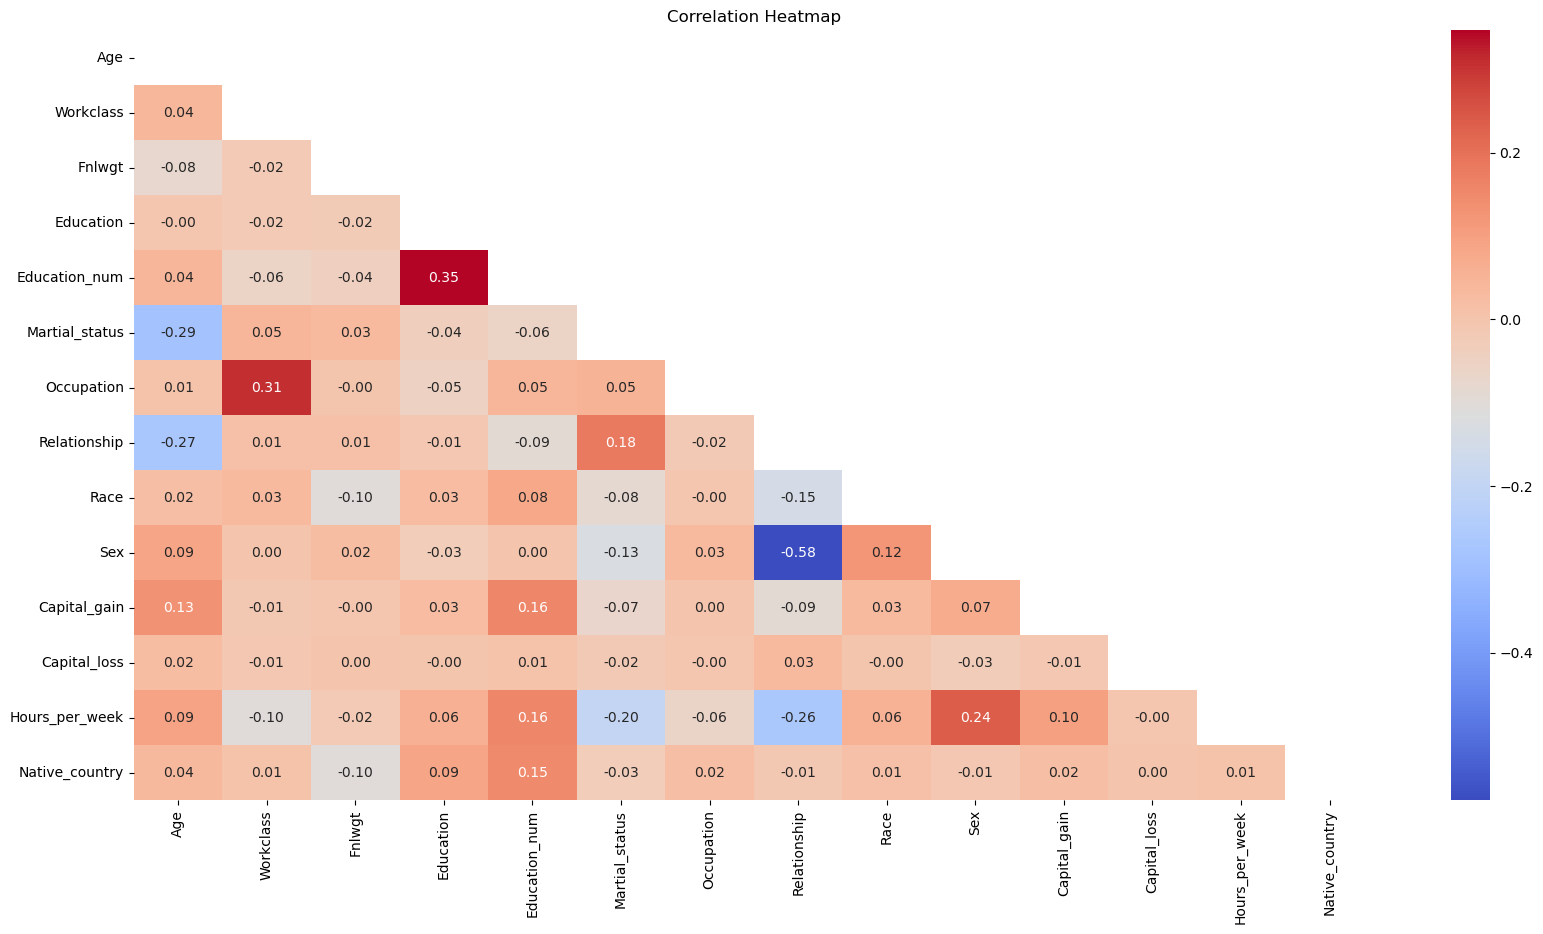

Features to remove:  set()
Summary after removing multicollinearity:


,Age,Workclass,Fnlwgt,Education,Education_num,Martial_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,27783.000000,27783.000000,27783.000000,27783.000000,27783.000000,27783.000000,27783.000000,27783.000000,27783.000000,27783.000000,27783.000000,27783.000000,27783.000000,27783.000000,27783.000000
mean,38.157002,3.362740,186265.746392,10.337581,10.065688,2.615052,6.380412,1.468236,3.791203,0.662815,572.104488,1.212108,39.924774,37.588453,0.224094
std,13.400133,1.573051,94653.827265,3.874353,2.419573,1.518655,4.345345,1.605881,0.605501,0.472757,2335.066549,32.579659,11.151203,2.475962,0.416992
min,17.000000,0.000000,18827.000000,0.000000,3.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,4.000000,19.000000,0.000000
25%,27.000000,3.000000,118495.500000,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,38.000000,0.000000
50%,37.000000,3.000000,178811.000000,11.000000,10.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,38.000000,0.000000
75%,47.000000,3.000000,234919.500000,12.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,38.000000,0.000000
max,79.000000,8.000000,505980.000000,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,22040.000000,1258.000000,77.000000,41.000000,1.000000


In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# # Calculate the correlation matrix
correlation_matrix = df.drop('Income', axis=1).corr()

# # Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Plot the heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', mask=mask, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Find features with high correlation
high_corr_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            colname = correlation_matrix.columns[i]
            high_corr_features.add(colname)
print("Features to remove: ",high_corr_features)

# Remove highly correlated features
df = df.drop(high_corr_features, axis=1)

# Print summary after removing multicollinearity
print("Summary after removing multicollinearity:")
df.describe()


### 4: Check Skewness, remove 

In [20]:
import pandas as pd
from scipy.stats import skew

# Check the shape of the DataFrame after removing skewed variables
print("Original DataFrame shape:", df.shape)

# Separate numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
numerical_columns = numerical_columns.drop('Income')

# Calculate skewness
skewness = df[numerical_columns].apply(lambda x: skew(x))

# Display skewness
print("Skewness:")
print(skewness)

# Remove variables with skewness greater than 1 (or any other threshold you choose)
skewed_variables = skewness[abs(skewness) > 1].index
df = df.drop(columns=skewed_variables)

# Check the shape of the DataFrame after removing skewed variables
# print("Original DataFrame shape:", df.shape)
print("DataFrame shape after removing skewed variables:", df.shape)


Original DataFrame shape: (27783, 15)
Skewness:
Age                0.484789
Workclass          1.183313
Fnlwgt             0.627805
Education         -0.955778
Education_num     -0.146233
Martial_status    -0.045494
Occupation         0.135723
Relationship       0.752957
Race              -2.587130
Sex               -0.688803
Capital_gain       4.930696
Capital_loss      29.519883
Hours_per_week    -0.359704
Native_country    -5.178743
dtype: float64
DataFrame shape after removing skewed variables: (27783, 10)


### 5: Use standard scaler

In [21]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# df_scaled = df.copy()

# Separate numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
numerical_columns = numerical_columns.drop('Income')

# Apply StandardScaler to numerical columns
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Check the scaled data
print(df.head())


        Age    Fnlwgt  Education  Education_num  Martial_status  Occupation  \
0  0.883813 -1.087717  -0.345246       1.212761       -0.405005   -0.777953   
1 -0.011717  0.310402   0.170979      -0.440452       -1.721984   -0.317682   
2  1.107695  0.511930  -2.410144      -1.267059       -0.405005   -0.317682   
4 -0.086344  1.038712   0.429091       1.626065       -0.405005   -0.777953   
5  0.809185 -0.275522  -1.119583      -2.093666        0.253484    0.142589   

   Relationship       Sex  Hours_per_week  Income  
0     -0.914303  0.713243       -2.414561       0  
1     -0.291581  0.713243        0.006746       0  
2     -0.914303  0.713243        0.006746       0  
4      2.199308 -1.402047        0.006746       0  
5     -0.291581 -1.402047       -2.145527       0  


### 6: Check VIF

In [22]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Check the shape of the DataFrame after removing multicollinear variables
print("Original DataFrame shape:", df.shape)

# Separate numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
numerical_columns = numerical_columns.drop('Income')

# Calculate VIF
X = add_constant(df[numerical_columns])
vif_data = pd.DataFrame()
vif_data["Variable"] = numerical_columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(1, X.shape[1])]

# Display variables with high VIF
print("Variables with high VIF:")
print(vif_data[vif_data['VIF'] > 10])

# Remove variables with high VIF
high_vif_variables = vif_data[vif_data['VIF'] > 10]['Variable']
df = df.drop(columns=high_vif_variables)

# Check the shape of the DataFrame after removing multicollinear variables
# print("Original DataFrame shape:", df_vif.shape)
print("DataFrame shape after removing multicollinearity:", df.shape)


Original DataFrame shape: (27783, 10)
Variables with high VIF:
Empty DataFrame
Columns: [Variable, VIF]
Index: []
DataFrame shape after removing multicollinearity: (27783, 10)


### 7: Apply feature scalling method on numerical feature

In [24]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# df_scaled = df.copy()
tar = df['Income'].copy()

# Separate numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
numerical_columns = numerical_columns.drop('Income')

# Apply StandardScaler to numerical columns
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

df['Income'] = tar

# Check the scaled data
print(df.head())

        Age    Fnlwgt  Education  Education_num  Martial_status  Occupation  \
0  0.883813 -1.087717  -0.345246       1.212761       -0.405005   -0.777953   
1 -0.011717  0.310402   0.170979      -0.440452       -1.721984   -0.317682   
2  1.107695  0.511930  -2.410144      -1.267059       -0.405005   -0.317682   
4 -0.086344  1.038712   0.429091       1.626065       -0.405005   -0.777953   
5  0.809185 -0.275522  -1.119583      -2.093666        0.253484    0.142589   

   Relationship       Sex  Hours_per_week  Income  
0     -0.914303  0.713243       -2.414561       0  
1     -0.291581  0.713243        0.006746       0  
2     -0.914303  0.713243        0.006746       0  
4      2.199308 -1.402047        0.006746       0  
5     -0.291581 -1.402047       -2.145527       0  


### 8: Resampling to balance the class(if problem is classification)

In [25]:
# Not a classification problem

### 9: Apply feature selection method

In [27]:
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

# Assuming X is your feature matrix and y is your target variable
X = df.drop('Income', axis=1)
y = df['Income']

# Initialize the feature selector
selector = SelectKBest(score_func=f_regression, k=5)

# Fit the selector to your data
X_selected = selector.fit_transform(X, y)

# Get the indices of the selected features
selected_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features = X.columns[selected_indices]

# Subset the original DataFrame to keep only the selected features
df = df[selected_features]

# Print the selected features
print("Selected Features:")
print(selected_features)

# Optionally, you can concatenate the selected features with the target variable y
# if you need them together in one DataFrame
df = pd.concat([df, y], axis=1)


Selected Features:
Index(['Age', 'Education_num', 'Relationship', 'Sex', 'Hours_per_week'], dtype='object')


### 10: Split the data into feature and target variable x and y

In [28]:
# Split the data into feature variables (X) and target variable (y)
X = df.iloc[:, :-1]  # Features are all columns except the last one
y = df.iloc[:, -1]   # Target variable is the last column

# Display the first few rows of X and y
print("Feature variables (X):")
print(X.head())
print("\nTarget variable (y):")
print(y.head())

Feature variables (X):
        Age  Education_num  Relationship       Sex  Hours_per_week
0  0.883813       1.212761     -0.914303  0.713243       -2.414561
1 -0.011717      -0.440452     -0.291581  0.713243        0.006746
2  1.107695      -1.267059     -0.914303  0.713243        0.006746
4 -0.086344       1.626065      2.199308 -1.402047        0.006746
5  0.809185      -2.093666     -0.291581 -1.402047       -2.145527

Target variable (y):
0    0
1    0
2    0
4    0
5    0
Name: Income, dtype: int64


### 11: Divide data into 4 part,  X_train, y_train, x_test, y_test by using train test split method

In [29]:
from sklearn.model_selection import train_test_split

# Divide the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Display the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (20837, 5)
y_train shape: (20837,)
X_test shape: (6946, 5)
y_test shape: (6946,)


### 12: Building models and checking cross validation score

In [34]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression


# Build RandomForestClassifier
rf_model = RandomForestRegressor(random_state=42)
# Calculate cross-validation scores for RandomForestClassifier
rf_cv_scores = cross_val_score(rf_model, X, y, cv=3)


# Build Linear Regression model
lr_model = LinearRegression()
# Calculate cross-validation scores for LinearRegrssionClassifer
lr_cv_scores = cross_val_score(lr_model, X, y, cv=3)


# Print cross-validation scores
print("Cross-validation scores for RandomForestClassifier:", rf_cv_scores)
print("Mean cross-validation score for RandomForestClassifier:", rf_cv_scores.mean())
print("\nCross-validation scores for LinearRegressionClassifier:", lr_cv_scores)
print("Mean cross-validation score for LinearRegressionClassifier:",lr_cv_scores.mean())

Cross-validation scores for RandomForestClassifier: [0.23069193 0.21831428 0.23380136]
Mean cross-validation score for RandomForestClassifier: 0.22760252335937733

Cross-validation scores for LinearRegressionClassifier: [0.20346558 0.20706839 0.21427587]
Mean cross-validation score for LinearRegressionClassifier: 0.208269945777501


### 13: Find best model

In [35]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

# Initialize models
models = {
    "RandomForestClassifier": RandomForestRegressor(random_state=42),
    "LinearRegression": LinearRegression()
}

# Evaluate models using cross-validation
for name, model in models.items():
    cv_scores = cross_val_score(model, X, y, cv=3)
    print(f"Cross-validation scores for {name}: {cv_scores}")
    print(f"Mean cross-validation score for {name}: {cv_scores.mean()}\n")

# Find the best model
best_model_name = max(models, key=lambda k: cross_val_score(models[k], X, y, cv=5).mean())
print(f"The best model is {best_model_name} with a mean cross-validation score of {cross_val_score(models[best_model_name], X, y, cv=5).mean()}")


Cross-validation scores for RandomForestClassifier: [0.23069193 0.21831428 0.23380136]
Mean cross-validation score for RandomForestClassifier: 0.22760252335937733

Cross-validation scores for LinearRegression: [0.20346558 0.20706839 0.21427587]
Mean cross-validation score for LinearRegression: 0.208269945777501

The best model is RandomForestClassifier with a mean cross-validation score of 0.2344434979159399


### 14: Hyper parameters tunning

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

# Initialize the LinearRegression model
lr = LinearRegression()

# Define the hyperparameters grid
param_grid = {
    'fit_intercept': [True, False]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5)

# Perform grid search to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Evaluate the model with best hyperparameters on the test set
best_lr = LinearRegression(**best_params)
best_lr.fit(X_train, y_train)
test_score = best_lr.score(X_test, y_test)
print("Test Set R^2 Score:", test_score)


Best Hyperparameters: {'fit_intercept': True}
Test Set R^2 Score: 0.19360756950674318


### 15: Save the model by using job lib method

In [37]:
# Import joblib for model saving (for scikit-learn versions before 0.23)
from sklearn.ensemble import RandomForestClassifier
import joblib  # Import joblib directly

# Save the trained model
joblib.dump(best_lr, 'lr_model_data2.pkl')

['lr_model_data2.pkl']

### 16: Load the data by using joblib method 

In [38]:
import joblib

# Load the trained model
loaded_model = joblib.load('lr_model_data2.pkl')
print('Loaded Model', loaded_model)

Loaded Model LinearRegression()


### 17: Use the test dataset file to predict the target variable

In [39]:
import pandas as pd
import joblib

# Load the test dataset
test_df =   df.copy()

# Assuming the test dataset has the same features as the training dataset (except the target variable)
X_test = test_df.drop('Income', axis=1)  # Features

X_test = X_test.sample(1)

# Load the trained model
loaded_model = joblib.load('lr_model_data2.pkl')

# Use the loaded model to make predictions on the test dataset
predictions = loaded_model.predict(X_test)

# Print the predictions
print("Predictions for the test dataset:")
print(predictions)


Predictions for the test dataset:
[0.30305772]


#### The above code teaches you the method, although the accuracies might not be good. Explore and feel free to explore the code.